**Mount Dataset and Reviewing of Data Values**

In [3]:
import pandas as pd

# Load the dataset

df = pd.read_csv('/content/tmdb_top_10k_movies_2026.csv.csv')

#The "Big Picture" - How much data are we dealing with?
print(f"Dataset Shape: {df.shape}")

#The "Schema Check" - Are numbers actually numbers?
print("\n--- Data Types ---")
print(df.dtypes)

#The "Missing Value" Hunt - Where are the holes?
print("\n--- Missing Values ---")
print(df.isnull().sum())

Dataset Shape: (10000, 10)

--- Data Types ---
Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
overview              object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

--- Missing Values ---
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
overview             2
popularity           0
release_date         3
title                0
vote_average         0
vote_count           0
dtype: int64


**Data Cleaning**

In [4]:
# Drop the unnecessary 'Unnamed: 0' column
df_clean = df.drop(columns=['Unnamed: 0'])

# Handle Missing Values
df_clean = df_clean.dropna(subset=['overview', 'release_date'])

#Fix Data Types
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'])

#Feature Engineering (Creating new data from old data)
df_clean['release_year'] = df_clean['release_date'].dt.year

#Final Check
print("New Shape:", df_clean.shape)
print(df_clean.info())

New Shape: (9996, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 9996 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          9996 non-null   object        
 1   id                 9996 non-null   int64         
 2   original_language  9996 non-null   object        
 3   overview           9996 non-null   object        
 4   popularity         9996 non-null   float64       
 5   release_date       9996 non-null   datetime64[ns]
 6   title              9996 non-null   object        
 7   vote_average       9996 non-null   float64       
 8   vote_count         9996 non-null   int64         
 9   release_year       9996 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(4)
memory usage: 820.0+ KB
None


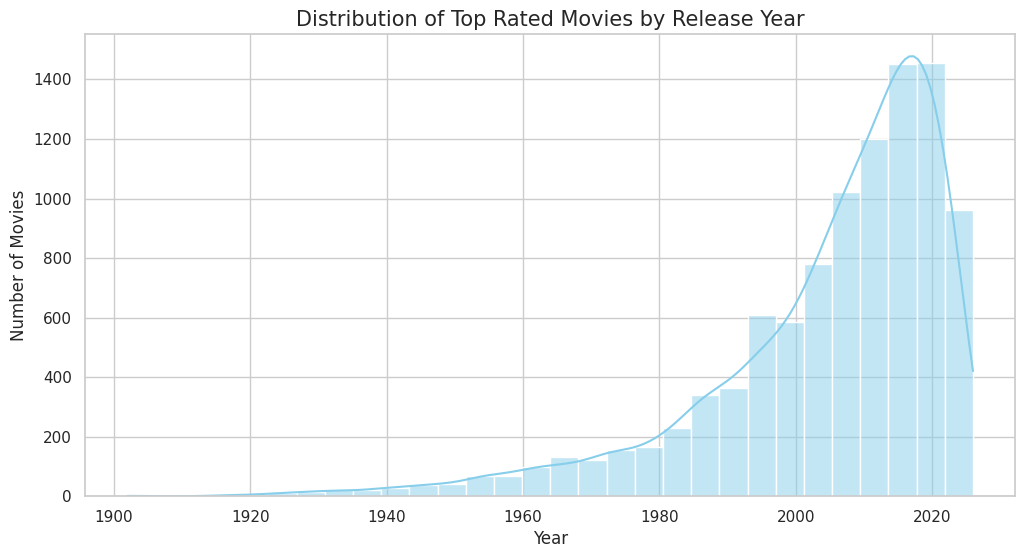

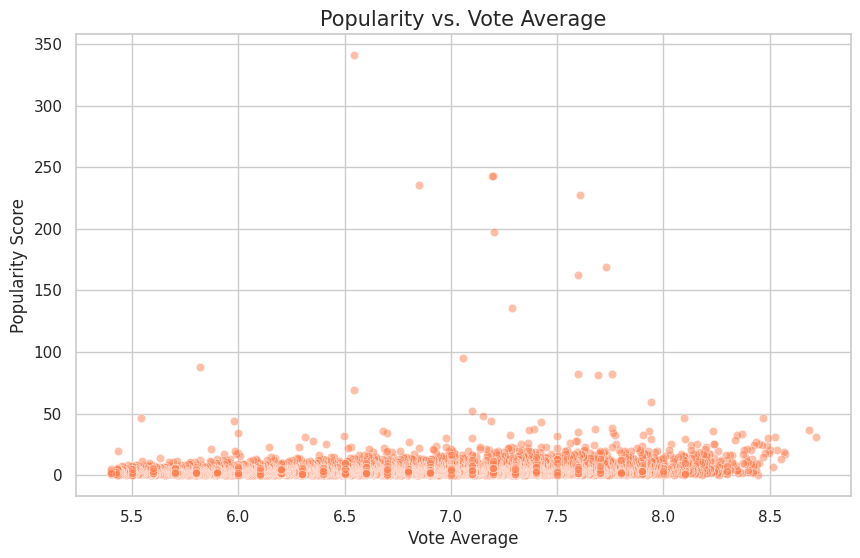

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#Set the style for a professional look
sns.set_theme(style="whitegrid")

#Trend Analysis: Number of Top Rated Movies per Year
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['release_year'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Top Rated Movies by Release Year', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.show()

#Quality Analysis: Popularity vs. Vote Average
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='vote_average', y='popularity', alpha=0.5, color='coral')
plt.title('Popularity vs. Vote Average', fontsize=15)
plt.xlabel('Vote Average', fontsize=12)
plt.ylabel('Popularity Score', fontsize=12)
plt.show()